# Assignment 4
For this assignment, you’re required to implement from scratch the Agglomerative Hierarchical Clustering.

1. Refer to the steps described in the lecture and the tutorial to implement a function that performs Agglomerative Hierarchical Clustering.
- Your function should take as input the data, number of clusters and linkage method and return the clusters.
- You should implement at least 2 linkage methods: Single-Link and Ward’s Distance.

Helping functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate distance between two clusters using single linkage method
def single_linkage(cluster1, cluster2):
    # Calculate pairwise distances between points in cluster1 and cluster2,
    # then compute the minimum distance
    return np.min(np.linalg.norm(cluster1[:, np.newaxis] - cluster2, axis=-1))

# Function to calculate distance between two clusters using Ward linkage method
def ward_linkage(cluster1, cluster2):
    # Compute the centroid of the merged cluster
    centroid = np.mean(np.vstack([cluster1, cluster2]), axis=0)
    # Compute the sum of squared distances between each point in the clusters and the centroid,
    # then sum them up to get the total distance
    return np.sum(np.linalg.norm(cluster1 - centroid, axis=-1)**2) + np.sum(np.linalg.norm(cluster2 - centroid, axis=-1)**2)

# Function to plot clustered data points
def plot_clusters(X, clusters):
    # Get a colormap for coloring clusters
    cmap = plt.cm.get_cmap('Set1')
    num_clusters = len(clusters)
    # Check if there are too many clusters for the chosen colormap
    if num_clusters > cmap.N:
        raise ValueError("Too many clusters for the chosen colormap. Please choose a colormap supporting more colors.")
    
    # Create a scatter plot for each cluster
    fig, ax = plt.subplots()
    for i, cluster_indices in enumerate(clusters):
        ax.scatter(X[cluster_indices, 0], X[cluster_indices, 1], color=cmap(i), label=f'Cluster {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.show()


In [2]:
# Agglomerative Clustering Function
def hierarchical_clustering(X, n_clusters, linkage='single'):
    # Get the number of data points
    n = X.shape[0]

    # Initialize a distance matrix with infinite distances except for diagonal elements
    matrix = np.zeros((n, n))
    np.fill_diagonal(matrix, np.inf)

    # Initialize each data point as a single cluster
    clusters = [[i] for i in range(n)]

    # Choose the appropriate linkage function based on the specified methods
    if linkage.lower() == "ward":
        linkage_func = ward_linkage
    elif linkage.lower() == "single":
        linkage_func = single_linkage
    else:
        raise Exception("Please choose a linkage method from [Single or Ward's] methods")

    # Merge clusters iteratively until the desired number of clusters is reached
    for m in np.arange(start=n, stop=n_clusters, step=-1):
        min_dist = np.inf
        
        # Iterate through each pair of clusters
        for i in range(m):
            for j in range(i + 1, m):
                # Calculate the distance between the current pair of clusters
                dist = linkage_func(X[clusters[i]], X[clusters[j]])
                # Update the minimum distance and indices if a smaller distance is found
                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)

        # Merge the closest pair of clusters
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]

        # Update the distance matrix after merging
        for k in range(m):
            if k != i:
                if k < j:
                    # Recalculate distances involving the merged cluster
                    matrix[i, k] = matrix[k, i] = linkage_func(X[clusters[i]], X[clusters[k]])
                else:
                    # Recalculate distances involving the cluster that moved due to merging
                    matrix[i, k] = matrix[k, i] = linkage_func(X[clusters[i]], X[clusters[k - 1]])

        # Remove the rows and columns corresponding to the merged cluster from the distance matrix
        matrix = np.delete(matrix, j, axis=0)
        matrix = np.delete(matrix, j, axis=1)

    # Assign labels to data points based on the final clusters
    labels = np.zeros(X.shape[0], dtype=int)
    for label, cluster in enumerate(clusters):
        labels[cluster] = label

    plot_clusters(X,clusters)
    # # Return labels and cluster assignments
    # return labels, clusters

2. Load the Iris dataset. For visualization purposes, use only the following two features as your data for this assignment: “sepal length” and “petal length”.

In [3]:
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Extract only the "sepal length" and "petal length" features
data = iris.data[:, [0, 2]]  # Selecting sepal length and petal length
data

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

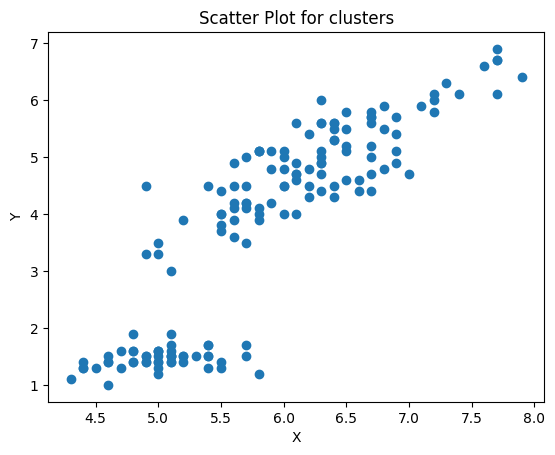

In [4]:
# Ploting data for visualization

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
ax.set(
    xlabel='X',
    ylabel='Y',
    title='Scatter Plot for clusters'
)
plt.show()

3. You’re required to apply your function to the described data using both Single-Link and Ward’s Distance methods. For each method, plot the clusters produced by your function for three numbers of clusters: 3 clusters, 4 clusters and 5 clusters. (i.e. 3 plots for each linkage method, each is a scatter plot of the data with color mapping for the produced clusters).

Single-Link method:

C:\Users\yahya\AppData\Local\Temp\ipykernel_3692\1361435307.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


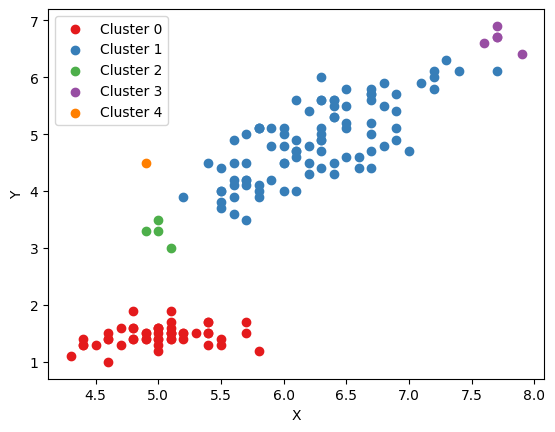

In [5]:
hierarchical_clustering(data,5,"single") # 5 clusters

C:\Users\yahya\AppData\Local\Temp\ipykernel_3692\1361435307.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


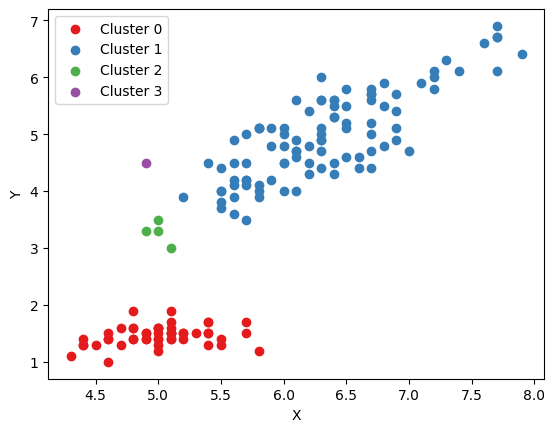

In [6]:
hierarchical_clustering(data,4,"single") # 4 clusters

C:\Users\yahya\AppData\Local\Temp\ipykernel_3692\1361435307.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


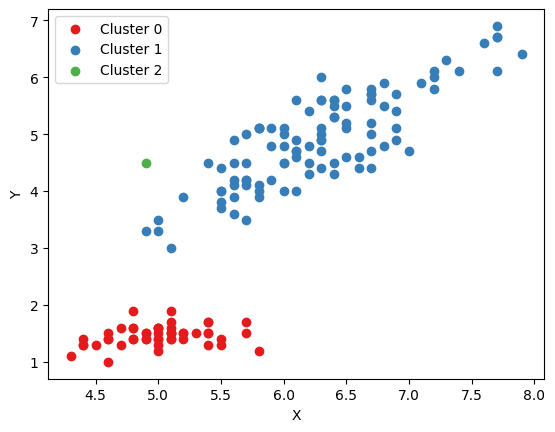

In [7]:
hierarchical_clustering(data,3,"single") # 3 clusters

Ward's distance method:

C:\Users\yahya\AppData\Local\Temp\ipykernel_3692\1361435307.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


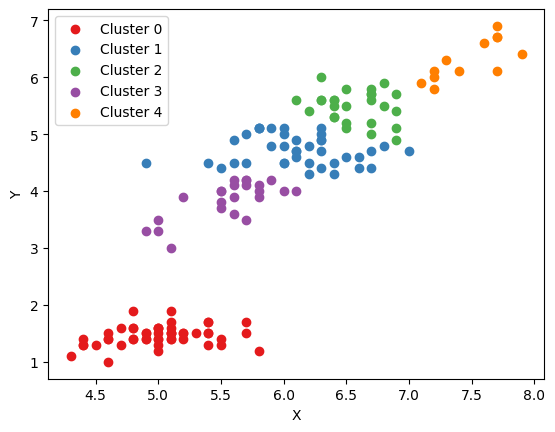

In [8]:
hierarchical_clustering(data,5,"ward") # 5 clusters

C:\Users\yahya\AppData\Local\Temp\ipykernel_3692\1361435307.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


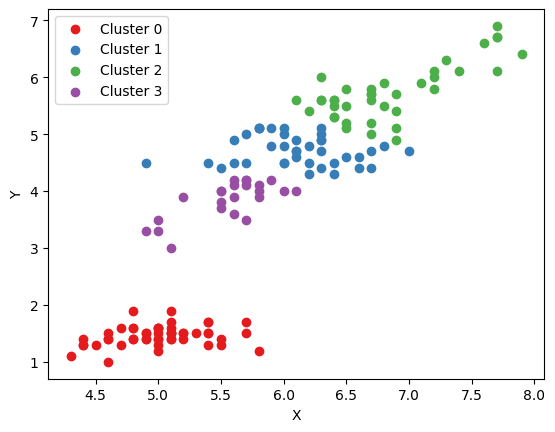

In [9]:
hierarchical_clustering(data,4,"ward") # 4 clusters

C:\Users\yahya\AppData\Local\Temp\ipykernel_3692\1361435307.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set1')


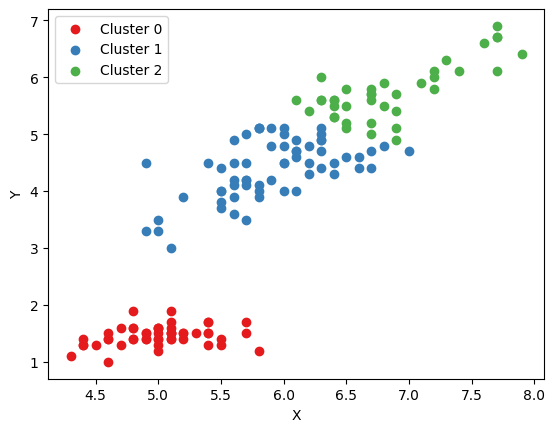

In [10]:
hierarchical_clustering(data,3,"ward") # 3 clusters

4. Compare the plots of both linkage methods in terms of sensitivity to outliers and the shape of formed clusters.

Point of comparison | Single-link | Ward's Distance |
--- | --- | --- |
*Sensitive to outliers* | Yes | No  |
*Shape of formed clusters* | Long & elongated clusters | Better defined clusters |